# Problem set 6

## Fulin Guo

### 1.

#### a.

In [1]:
import pandas as pd
df1 = pd.read_csv('/Users/fulinguo/Desktop/persp-model-econ_W19/ProblemSets/PS6/data/Auto.csv',na_values='?')

In [2]:
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


#### b.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f89c908>,
      dtype=object)

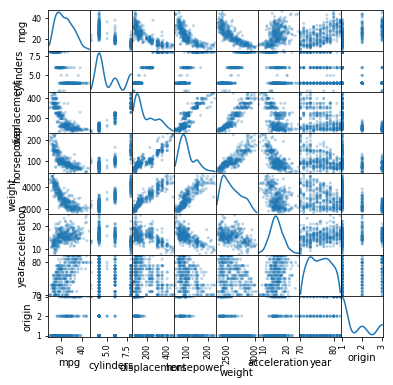

In [4]:
from pandas.plotting import scatter_matrix
scatter_matrix(df1, alpha=0.3, figsize=(6, 6), diagonal='kde')

#### c.

In [5]:
pd.DataFrame.corr(df1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


#### d.

In [6]:
import statsmodels.api as sm
df1['const'] = 1
reg1 = sm.OLS(endog=df1['mpg'], exog=df1[['const', 'cylinders','displacement','horsepower','weight','acceleration','year','origin']], missing='drop')
type(reg1)

statsmodels.regression.linear_model.OLS

In [7]:
results = reg1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 19 Feb 2019   Prob (F-statistic):          2.04e-139
Time:                        14:35:29   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

i. The coefficients of (constant), displacement, weight, year, and origin are statistically significant at the 1% level.

ii. The coefficients of cylinders, horsepower, and acceleration are not statistically significant at the 10% level.

iii. The coefficient of $Year$ is about 0.7508, which is significantly larger than 0. It means holding other factors constant, if a car is made one year later, in average, the car can travel about 0.75 miles more per gallon. This is because the larger value of year of a car indicates that the car is newer, and newer cars tend to travel more miles per gallon (might because the devices of the car have not depreciated a lot, or the cars are made using new techniques or materials). 

#### e.

From part (b), the variables $displacement$, $horsepower$, and $weight$, look most likely to have a nonlinear relationship with $mpg$. 

i.

In [8]:
df1['const'] = 1
df1['displacement_2']=df1['displacement']**2
df1['weight_2']=df1['weight']**2
df1['horsepower_2']=df1['horsepower']**2
df1['acceleration_2']=df1['acceleration']**2
reg2 = sm.OLS(endog=df1['mpg'], exog=df1[['const', 'cylinders','displacement','displacement_2', 'horsepower','horsepower_2',
                                          'weight', 'weight_2','acceleration','acceleration_2','year','origin']], missing='drop')
results2=reg2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Tue, 19 Feb 2019   Prob (F-statistic):          1.75e-160
Time:                        14:35:56   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             20.1084      6.696      3.

ii. The adjusted R-squared is 0.866. It is better than the adjusted R-squared from part (d), which is 0.818

iii. The coefficient of $displacement_{i}$ becomes insignificant (p-value is 0.408). The coefficient of its squared term is also not significant (p-value is 0.532), alought in part (d), the coefficient of $displacement_{i}$ is significant at the 1% level as its p-value is 0.008

iv. The coefficient of $cylinders_{i}$ is insignificant in this part as the p-value is 0.440. In part (d), the coefficient of $cylinders_{i}$ is also insignificant. We can note that the p-value of this coefficient increases from part (d) to part (e)

#### f.

In [9]:
pre=results2.predict(exog=[1, 6, 200, 40000, 100, 10000, 3100,3100**2, 15.1, 15.1**2, 99,1 ])[0]
print('The predicted miles per gallon mpg of the car is:',pre)

The predicted miles per gallon mpg of the car is: 38.73211109716943


### 2.

#### a.

In [11]:
import math
d1=math.sqrt((0-0)**2+(3-0)**2+(0-0)**2)
print('The Euclidean distance between the observation 1 and the test point is:',d1)
d2=math.sqrt((2-0)**2+(0-0)**2+(0-0)**2)
print('The Euclidean distance between the observation 2 and the test point is:',d2)
d3=math.sqrt((0-0)**2+(1-0)**2+(3-0)**2)
print('The Euclidean distance between the observation 3 and the test point is:',d3)
d4=math.sqrt((0-0)**2+(1-0)**2+(2-0)**2)
print('The Euclidean distance between the observation 4 and the test point is:',d4)
d5=math.sqrt((-1-0)**2+(0-0)**2+(1-0)**2)
print('The Euclidean distance between the observation 5 and the test point is:',d5)
d6=math.sqrt((1-0)**2+(1-0)**2+(1-0)**2)
print('The Euclidean distance between the observation 6 and the test point is:',d6)

The Euclidean distance between the observation 1 and the test point is: 3.0
The Euclidean distance between the observation 2 and the test point is: 2.0
The Euclidean distance between the observation 3 and the test point is: 3.1622776601683795
The Euclidean distance between the observation 4 and the test point is: 2.23606797749979
The Euclidean distance between the observation 5 and the test point is: 1.4142135623730951
The Euclidean distance between the observation 6 and the test point is: 1.7320508075688772


#### b.

The KNN prediction with K=1 is Green since the observation 5 is the closest observation to the test point as the Euclidean distance between the observation 5 and the test point is $\sqrt {2}$, which is the smallest among the six Euclidean distances (showed in part (a)), and the Y of observation 5 is Green, so we predict the test point $X_{1}=X_{2}=X_{3}=0$ is also Green based on K=1.

#### C.

From part (a), the three closest observations to the test point are observation 5, 6, and 2. The Y of observation 5, 6, 2 are Green, Red, Red respectively. Therefore, there are two Red and one Green in the three closest observations of the test point. Thus, we should predict the test point $X_{1}=X_{2}=X_{3}=0$ is Red based on K=3.

#### d.

I expect the best value for K would be small if the optimal decision boundary is highly nonlinear. 

This is because small K means the estimation is more flexible, which indicates we can detect more complex patterns from observations. Since the optimal decision boundary is highly nonlinear, in order to detect this complex pattern, we need to set K small to avoid underfitting (If the K is large, the estimation would be less flexible and the outcome tends to be more linear).

#### e.

In [35]:
import numpy as np
from sklearn import datasets, neighbors, linear_model
X_digits = np.array([[0,3,0],[2,0,0],[0,1,3],[0,1,2],[-1,0,1],[1,1,1]])
y_digits = np.array(['red','red','red','green','green','red'])
n_samples = len(X_digits)
X_train = X_digits
y_train = y_digits
X_test = [[1,1,1]]
y_test = ['red']
knn = neighbors.KNeighborsClassifier(2)
print('KNN score:' , knn.fit(X_train, y_train).score(X_test, y_test))
print('The prediction of the test point is:', knn.predict(X_test)[0])

KNN score: 0.0
The prediction of the test point is: green


Therefore, the prediction using python's scikt-learn library is Green.

(Actually, we can note that the number of red and green are the same in the two closest observations to the test point.)

#### 3.

In [41]:
med=df1['mpg'].median()
df1['mpg_high']=(df1['mpg']>=med)
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,const,displacement_2,weight_2,horsepower_2,acceleration_2,mpg_high
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,1,94249.0,12278016,16900.0,144.00,False
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,1,122500.0,13638249,27225.0,132.25,False
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,1,101124.0,11806096,22500.0,121.00,False
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,1,92416.0,11785489,22500.0,144.00,False
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,1,91204.0,11895601,19600.0,110.25,False


#### a.

In [42]:
import statsmodels.api as sm
df1=df1.dropna()
X=df1[['const', 'cylinders','displacement','horsepower','weight','acceleration','year','origin']].values
y=df1['mpg_high'].values
LogitModel=sm.Logit(y,X)
LogitReg_sm=LogitModel.fit()
LogitReg_sm.summary()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Tue, 19 Feb 2019   Pseudo R-squ.:                  0.7101
Time:                        22:59:57   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.1549      5.764     -2.976      0.003     -28.452      -5.858
x1            -0.1626      0.423     -0.384      0.701      -0.992       0.667
x2             0.0021      0.012      0.174      0.862      -0.021       0.026
x3            -0.0410      0.024     -1.718      0.086      -0.088       0.006
x4            -0.0043      0.001     -3.784      0.000      -0.007      -0.002
x5             0.0161      0.141      0.114      0.910      -0.261       0.293
x6             0.4295      0.075      5.709      0.000       0.282       0.577
x7             0.4773      0.362      1.319      0.187      -0.232       1.187
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

The coefficients that are statistically significant at the 5% level are (constant), $weight$, and $year$.

#### b.

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.5, random_state=10)

#### c.

In [44]:
LogitModel_tra=sm.Logit(y_train,X_train)
LogitReg_sm_tra=LogitModel_tra.fit()
LogitReg_sm_tra.summary()

Optimization terminated successfully.
         Current function value: 0.130082
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  196
Model:                          Logit   Df Residuals:                      188
Method:                           MLE   Df Model:                            7
Date:                Tue, 19 Feb 2019   Pseudo R-squ.:                  0.8123
Time:                        23:00:20   Log-Likelihood:                -25.496
converged:                       True   LL-Null:                       -135.85
                                        LLR p-value:                 4.683e-44
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -26.7996     11.062     -2.423      0.015     -48.482      -5.118
x1            -1.8304      0.809     -2.263      0.024      -3.416      -0.245
x2             0.0281      0.018      1.547      0.122      -0.008       0.064
x3             0.0153      0.034      0.446      0.656      -0.052       0.083
x4            -0.0075      0.002     -3.552      0.000      -0.012      -0.003
x5             0.1094      0.266      0.412      0.680      -0.411       0.630
x6             0.6432      0.165      3.888      0.000       0.319       0.967
x7             0.2444      0.602      0.406      0.685      -0.935       1.424
==============================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

The estimated $\beta_{0}$ is -26.7996.

The estimated $(\beta_{1},\beta_{2},\beta_{3},\beta_{4},\beta_{5},\beta_{6},\beta_{7})$ is (-1.8304, 0.0281, 0.0153, -0.0075, 0.1094, 0.6432, 0.2444) 

#### d.

In [45]:
y_pred=LogitReg_sm_tra.predict(X_test)
y_pred[y_pred>=0.5]=1
y_pred[y_pred<0.5]=0
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix=confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[86 13]
 [ 9 88]]
              precision    recall  f1-score   support

       False       0.91      0.87      0.89        99
        True       0.87      0.91      0.89        97

   micro avg       0.89      0.89      0.89       196
   macro avg       0.89      0.89      0.89       196
weighted avg       0.89      0.89      0.89       196



Therefore, the model predicts low mpg and high mpg equally well since the f1-scores for False and True are the same.